# MovieLens Dataset - Exploratory Data Analysis (EDA)

Análisis exploratorio del dataset MovieLens 1M para sistema de recomendación.

## 1. Importación de librerías

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import zipfile
import os
from collections import Counter
import warnings
warnings.filterwarnings('ignore')


## 2. Descarga y carga del dataset

In [40]:
# Crear directorio de datos si no existe
data_dir = '../data'
os.makedirs(data_dir, exist_ok=True)

# URL del dataset MovieLens 1M
url = 'http://files.grouplens.org/datasets/movielens/ml-1m.zip'
zip_path = os.path.join(data_dir, 'ml-1m.zip')
extract_path = os.path.join(data_dir, 'ml-1m')

# Descargar si no existe
if not os.path.exists(zip_path):
    print("Descargando MovieLens 1M dataset...")
    response = requests.get(url)
    with open(zip_path, 'wb') as f:
        f.write(response.content)
    print("Descarga completada.")

# Extraer si no existe
if not os.path.exists(extract_path):
    print("Extrayendo archivos...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(data_dir)
    print("Extracción completada.")

In [41]:
# Cargar datasets
print("Cargando datasets...")

# Ratings (ratings.dat: UserID::MovieID::Rating::Timestamp)
ratings = pd.read_csv(os.path.join(extract_path, 'ratings.dat'), sep='::', 
                     names=['userId', 'movieId', 'rating', 'timestamp'], engine='python')
print(f"Ratings cargados: {ratings.shape}")

# Movies (movies.dat: MovieID::Title::Genres)
movies = pd.read_csv(os.path.join(extract_path, 'movies.dat'), sep='::', 
                    names=['movieId', 'title', 'genres'], engine='python', encoding='latin-1')
print(f"Movies cargados: {movies.shape}")

# Users (users.dat: UserID::Gender::Age::Occupation::Zip-code)
users = pd.read_csv(os.path.join(extract_path, 'users.dat'), sep='::', 
                   names=['userId', 'gender', 'age', 'occupation', 'zipcode'], engine='python')
print(f"Users cargados: {users.shape}")

print("\nTodos los datasets cargados exitosamente.")

Cargando datasets...
Ratings cargados: (1000209, 4)
Movies cargados: (3883, 3)
Users cargados: (6040, 5)

Todos los datasets cargados exitosamente.


## 3. Exploración inicial de los datos

In [42]:
# Vista general de los datasets
print("=== RATINGS ===")
print(ratings.head())
print(f"\nInfo:")
ratings.info()

print("\n=== MOVIES ===")
print(movies.head())
print(f"\nInfo:")
movies.info()

print("\n=== USERS ===")
print(users.head())
print(f"\nInfo:")
users.info()

=== RATINGS ===
   userId  movieId  rating  timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   userId     1000209 non-null  int64
 1   movieId    1000209 non-null  int64
 2   rating     1000209 non-null  int64
 3   timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB

=== MOVIES ===
   movieId                               title                        genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to E

## 4. Análisis de Usuarios y Películas

In [43]:
# Estadísticas básicas
n_users = ratings['userId'].nunique()
n_movies = ratings['movieId'].nunique()
n_ratings = len(ratings)

print(f"Número total de usuarios: {n_users:,}")
print(f"Número total de películas: {n_movies:,}")
print(f"Número total de ratings: {n_ratings:,}")

# Sparsity de la matriz user-item
sparsity = 1 - (n_ratings / (n_users * n_movies))
print(f"\nSparsity de la matriz user-item: {sparsity:.4f} ({sparsity*100:.2f}%)")
print(f"Densidad: {(1-sparsity)*100:.4f}%")

Número total de usuarios: 6,040
Número total de películas: 3,706
Número total de ratings: 1,000,209

Sparsity de la matriz user-item: 0.9553 (95.53%)
Densidad: 4.4684%


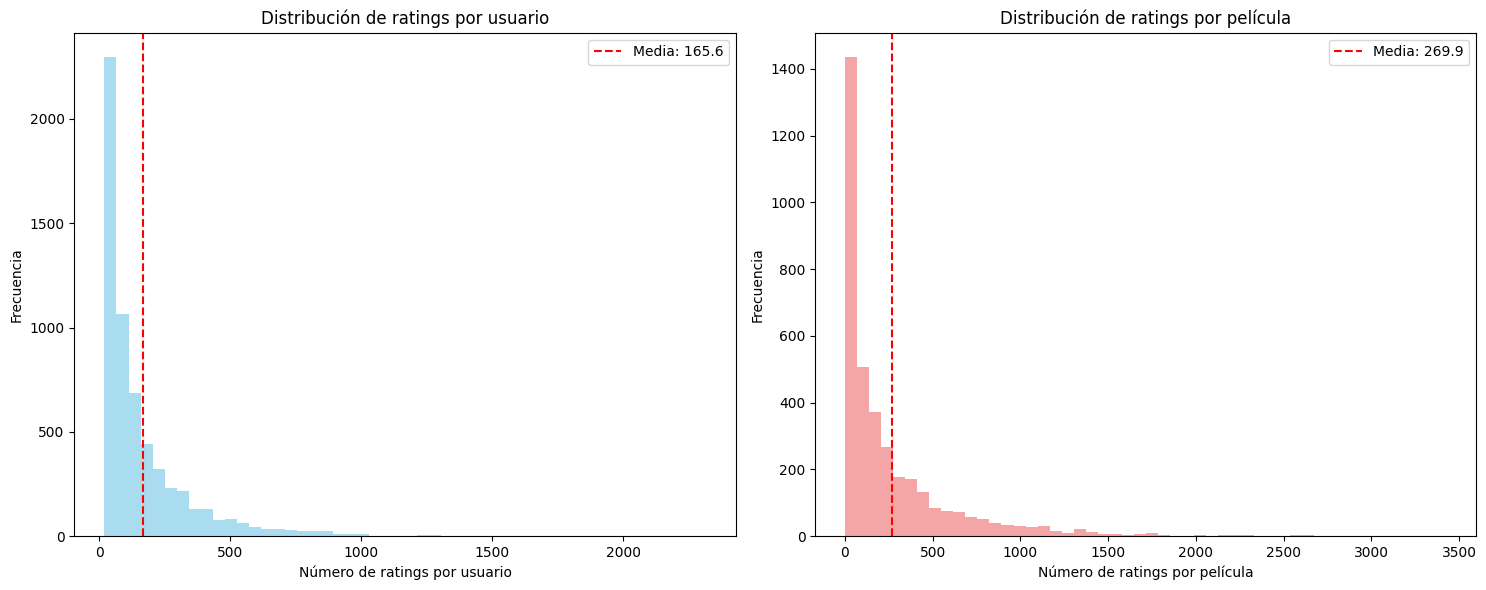

Estadísticas de ratings por usuario:
count    6040.000000
mean      165.597517
std       192.747029
min        20.000000
25%        44.000000
50%        96.000000
75%       208.000000
max      2314.000000
Name: count, dtype: float64

Estadísticas de ratings por película:
count    3706.000000
mean      269.889099
std       384.047838
min         1.000000
25%        33.000000
50%       123.500000
75%       350.000000
max      3428.000000
Name: count, dtype: float64


In [44]:
# Distribución de ratings por usuario
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
user_counts = ratings['userId'].value_counts()
plt.hist(user_counts, bins=50, alpha=0.7, color='skyblue')
plt.xlabel('Número de ratings por usuario')
plt.ylabel('Frecuencia')
plt.title('Distribución de ratings por usuario')
plt.axvline(user_counts.mean(), color='red', linestyle='--', label=f'Media: {user_counts.mean():.1f}')
plt.legend()

# Ratings por película
plt.subplot(1, 2, 2)
movie_counts = ratings['movieId'].value_counts()
plt.hist(movie_counts, bins=50, alpha=0.7, color='lightcoral')
plt.xlabel('Número de ratings por película')
plt.ylabel('Frecuencia')
plt.title('Distribución de ratings por película')
plt.axvline(movie_counts.mean(), color='red', linestyle='--', label=f'Media: {movie_counts.mean():.1f}')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Estadísticas de ratings por usuario:")
print(user_counts.describe())
print(f"\nEstadísticas de ratings por película:")
print(movie_counts.describe())


## 5. Distribución de Ratings

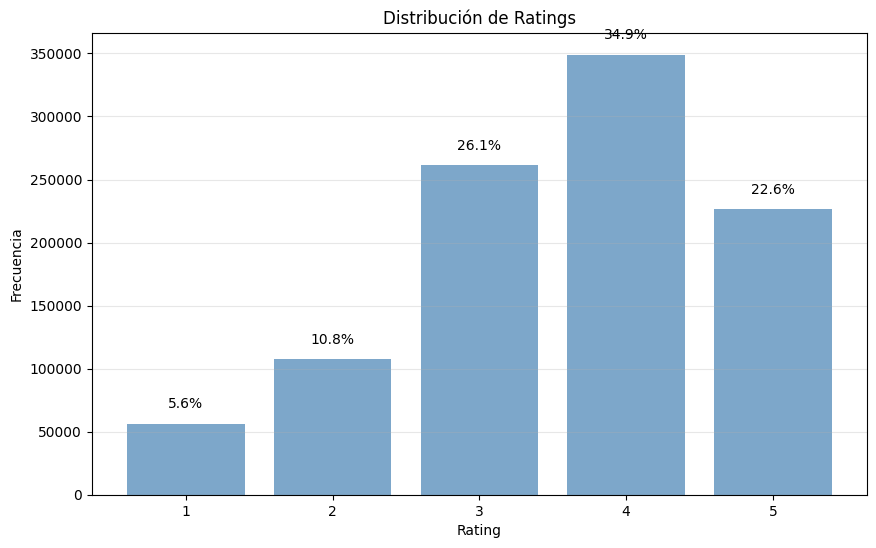

Distribución de ratings:
Rating 1: 56,174 (5.62%)
Rating 2: 107,557 (10.75%)
Rating 3: 261,197 (26.11%)
Rating 4: 348,971 (34.89%)
Rating 5: 226,310 (22.63%)

Rating promedio: 3.58
Mediana: 4.00


In [45]:
# Histograma de ratings
plt.figure(figsize=(10, 6))
rating_counts = ratings['rating'].value_counts().sort_index()

plt.bar(rating_counts.index, rating_counts.values, alpha=0.7, color='steelblue')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.title('Distribución de Ratings')

# Añadir porcentajes
total_ratings = len(ratings)
for rating, count in rating_counts.items():
    percentage = (count / total_ratings) * 100
    plt.text(rating, count + total_ratings*0.01, f'{percentage:.1f}%', 
             ha='center', va='bottom')

plt.grid(axis='y', alpha=0.3)
plt.show()

print("Distribución de ratings:")
for rating, count in rating_counts.items():
    percentage = (count / total_ratings) * 100
    print(f"Rating {rating}: {count:,} ({percentage:.2f}%)")

print(f"\nRating promedio: {ratings['rating'].mean():.2f}")
print(f"Mediana: {ratings['rating'].median():.2f}")

## 6. Popularidad de Películas

TOP 10 PELÍCULAS MÁS CALIFICADAS:
American Beauty (1999)                   |   3428 ratings | Avg: 4.32
Star Wars: Episode IV - A New Hope (1977) |   2991 ratings | Avg: 4.45
Star Wars: Episode V - The Empire Strikes Back (1980) |   2990 ratings | Avg: 4.29
Star Wars: Episode VI - Return of the Jedi (1983) |   2883 ratings | Avg: 4.02
Jurassic Park (1993)                     |   2672 ratings | Avg: 3.76
Saving Private Ryan (1998)               |   2653 ratings | Avg: 4.34
Terminator 2: Judgment Day (1991)        |   2649 ratings | Avg: 4.06
Matrix, The (1999)                       |   2590 ratings | Avg: 4.32
Back to the Future (1985)                |   2583 ratings | Avg: 3.99
Silence of the Lambs, The (1991)         |   2578 ratings | Avg: 4.35


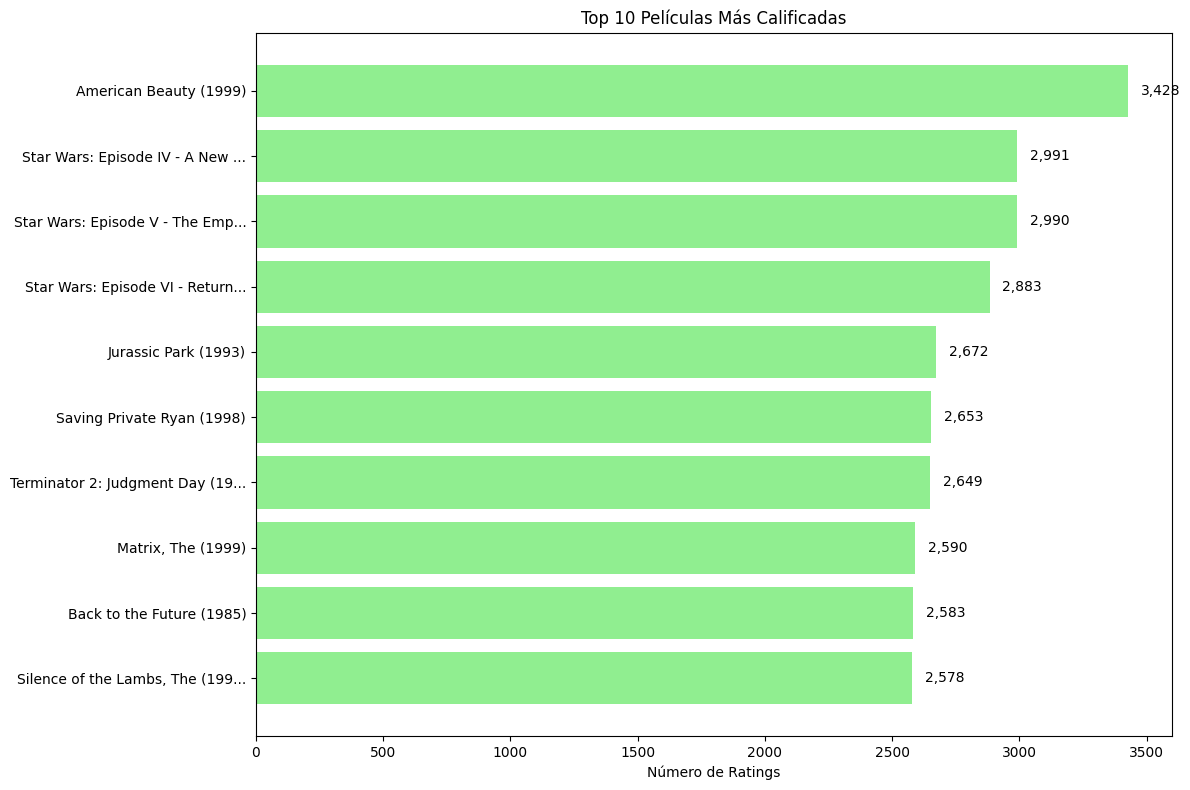

In [46]:
# Top 10 películas más calificadas
movie_ratings = ratings.groupby('movieId').agg({
    'rating': ['count', 'mean']
}).round(2)
movie_ratings.columns = ['num_ratings', 'avg_rating']
movie_ratings = movie_ratings.reset_index()

# Merge con información de películas
movie_stats = movie_ratings.merge(movies, on='movieId')

# Top 10 más calificadas (por número de ratings)
top_rated = movie_stats.nlargest(10, 'num_ratings')

print("TOP 10 PELÍCULAS MÁS CALIFICADAS:")
print("="*60)
for i, row in top_rated.iterrows():
    print(f"{row['title']:<40} | {row['num_ratings']:>6} ratings | Avg: {row['avg_rating']:.2f}")

# Visualización
plt.figure(figsize=(12, 8))
plt.barh(range(len(top_rated)), top_rated['num_ratings'], color='lightgreen')
plt.yticks(range(len(top_rated)), [title[:30] + '...' if len(title) > 30 else title 
                                   for title in top_rated['title']])
plt.xlabel('Número de Ratings')
plt.title('Top 10 Películas Más Calificadas')
plt.gca().invert_yaxis()

# Añadir valores en las barras
for i, v in enumerate(top_rated['num_ratings']):
    plt.text(v + 50, i, f'{v:,}', va='center')

plt.tight_layout()
plt.show()

## 7. Distribución por Género

DISTRIBUCIÓN POR GÉNERO:
Drama          :  1603 ( 25.0%)
Comedy         :  1200 ( 18.7%)
Action         :   503 (  7.8%)
Thriller       :   492 (  7.7%)
Romance        :   471 (  7.4%)
Horror         :   343 (  5.4%)
Adventure      :   283 (  4.4%)
Sci-Fi         :   276 (  4.3%)
Children's     :   251 (  3.9%)
Crime          :   211 (  3.3%)
War            :   143 (  2.2%)
Documentary    :   127 (  2.0%)
Musical        :   114 (  1.8%)
Mystery        :   106 (  1.7%)
Animation      :   105 (  1.6%)
Fantasy        :    68 (  1.1%)
Western        :    68 (  1.1%)
Film-Noir      :    44 (  0.7%)


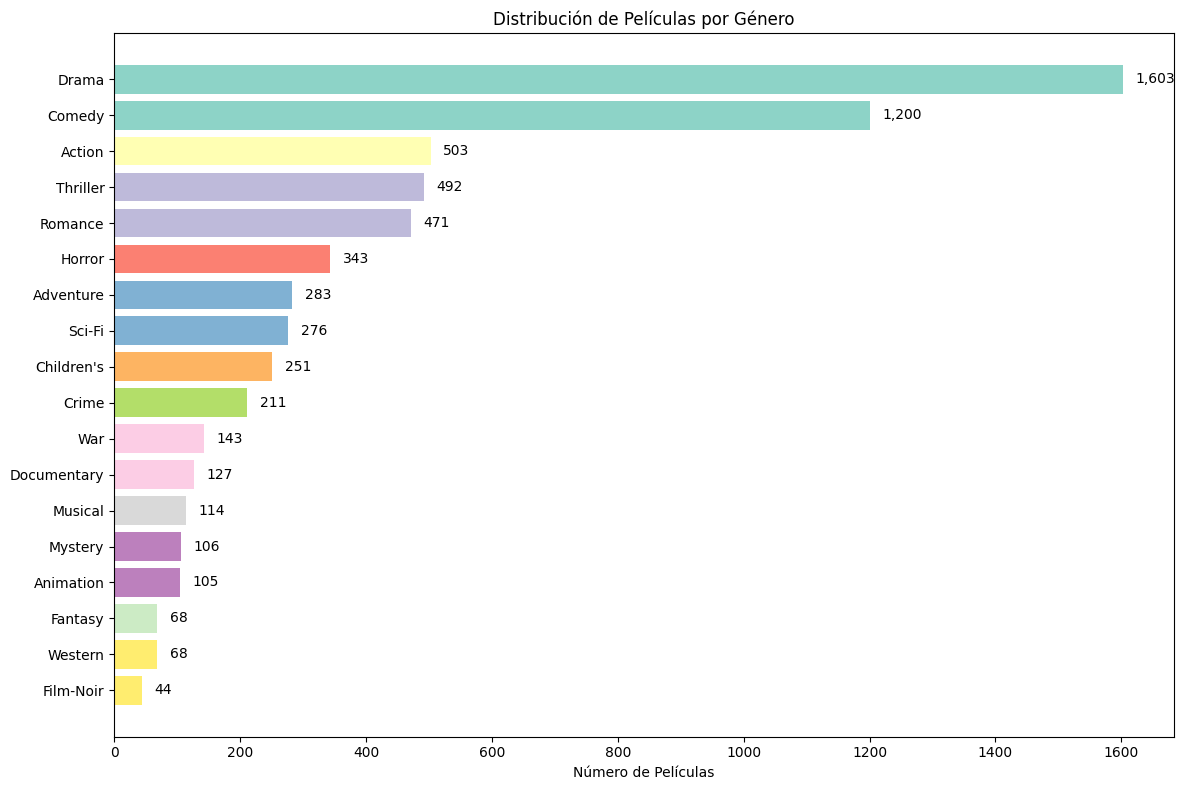

In [47]:
# Extraer géneros individuales
all_genres = []
for genres_str in movies['genres']:
    if pd.notna(genres_str) and genres_str != '(no genres listed)':
        genres = genres_str.split('|')
        all_genres.extend(genres)

genre_counts = Counter(all_genres)
genre_df = pd.DataFrame(list(genre_counts.items()), columns=['Genre', 'Count'])
genre_df = genre_df.sort_values('Count', ascending=False)

print("DISTRIBUCIÓN POR GÉNERO:")
print("="*40)
total_genre_entries = sum(genre_counts.values())
for _, row in genre_df.iterrows():
    percentage = (row['Count'] / total_genre_entries) * 100
    print(f"{row['Genre']:<15}: {row['Count']:>5} ({percentage:>5.1f}%)")

# Visualización
plt.figure(figsize=(12, 8))
colors = plt.cm.Set3(np.linspace(0, 1, len(genre_df)))
plt.barh(range(len(genre_df)), genre_df['Count'], color=colors)
plt.yticks(range(len(genre_df)), genre_df['Genre'])
plt.xlabel('Número de Películas')
plt.title('Distribución de Películas por Género')
plt.gca().invert_yaxis()

# Añadir valores en las barras
for i, v in enumerate(genre_df['Count']):
    plt.text(v + 20, i, f'{v:,}', va='center')

plt.tight_layout()
plt.show()

## 8. Análisis de Géneros Relacionados con "Relajación"

GÉNEROS RELACIONADOS CON RELAJACIÓN:
Comedy         : 1200 películas
Romance        :  471 películas
Children's     :  251 películas
Musical        :  114 películas
Animation      :  105 películas
Fantasy        :   68 películas


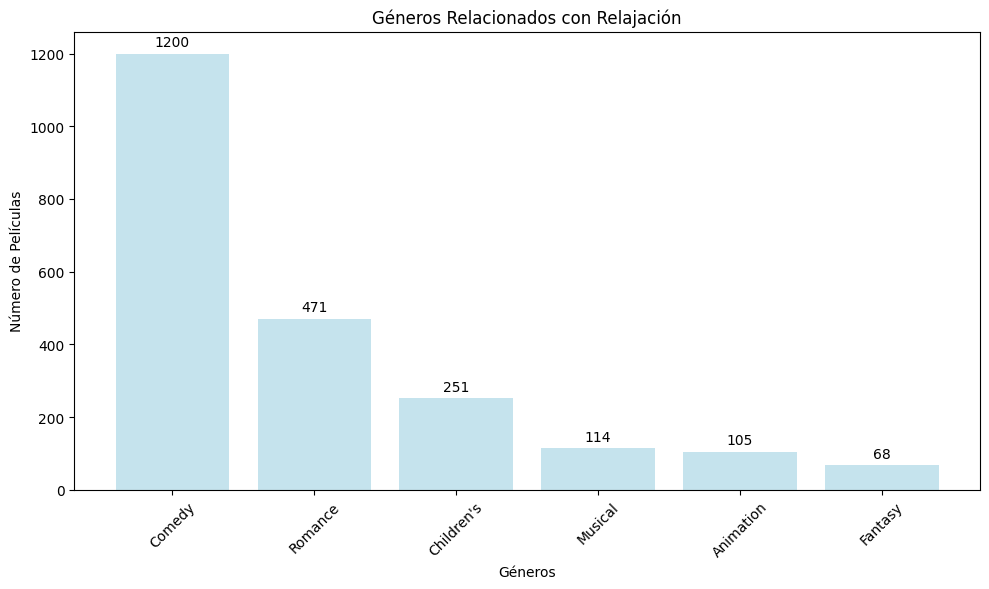


TOP 5 PELÍCULAS MÁS POPULARES POR GÉNERO DE RELAJACIÓN:

COMEDY:
  American Beauty (1999)         (3428 ratings)
  Back to the Future (1985)      (2583 ratings)
  Men in Black (1997)            (2538 ratings)
  Shakespeare in Love (1998)     (2369 ratings)
  Princess Bride, The (1987)     (2318 ratings)

ROMANCE:
  Star Wars: Episode VI - Return of the Jedi (1983) (2883 ratings)
  Shakespeare in Love (1998)     (2369 ratings)
  Princess Bride, The (1987)     (2318 ratings)
  Groundhog Day (1993)           (2278 ratings)
  Forrest Gump (1994)            (2194 ratings)

CHILDREN'S:
  E.T. the Extra-Terrestrial (1982) (2269 ratings)
  Toy Story (1995)               (2077 ratings)
  Babe (1995)                    (1751 ratings)
  Wizard of Oz, The (1939)       (1718 ratings)
  Bug's Life, A (1998)           (1703 ratings)

MUSICAL:
  Wizard of Oz, The (1939)       (1718 ratings)
  Aladdin (1992)                 (1351 ratings)
  Blues Brothers, The (1980)     (1341 ratings)
  Rocky Horror 

In [48]:
# Géneros relacionados con relajación
relaxation_genres = ['Comedy', 'Romance', 'Children\'s', 'Musical', 'Animation', 'Fantasy']

# Contar películas por género de relajación
relaxation_counts = {}
for genre in relaxation_genres:
    count = movies['genres'].str.contains(genre, na=False).sum()
    if count > 0:
        relaxation_counts[genre] = count

print("GÉNEROS RELACIONADOS CON RELAJACIÓN:")
print("="*40)
if relaxation_counts:
    for genre, count in sorted(relaxation_counts.items(), key=lambda x: x[1], reverse=True):
        print(f"{genre:<15}: {count:>4} películas")
    
    # Visualización
    plt.figure(figsize=(10, 6))
    genres = list(relaxation_counts.keys())
    counts = list(relaxation_counts.values())
    
    plt.bar(genres, counts, color='lightblue', alpha=0.7)
    plt.xlabel('Géneros')
    plt.ylabel('Número de Películas')
    plt.title('Géneros Relacionados con Relajación')
    plt.xticks(rotation=45)
    
    # Añadir valores en las barras
    for i, v in enumerate(counts):
        plt.text(i, v + max(counts)*0.01, str(v), ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
else:
    print("No se encontraron géneros de relajación especificados.")

# Películas más populares por género de relajación
print("\nTOP 5 PELÍCULAS MÁS POPULARES POR GÉNERO DE RELAJACIÓN:")
print("="*60)
for genre in relaxation_genres:
    genre_movies = movies[movies['genres'].str.contains(genre, na=False)]
    if not genre_movies.empty:
        genre_ratings = ratings[ratings['movieId'].isin(genre_movies['movieId'])]
        popular = genre_ratings.groupby('movieId').size().nlargest(5)
        print(f"\n{genre.upper()}:")
        for movie_id, count in popular.items():
            title = movies[movies['movieId'] == movie_id]['title'].iloc[0]
            print(f"  {title:<30} ({count} ratings)")

## 9. Análisis Demográfico de Usuarios

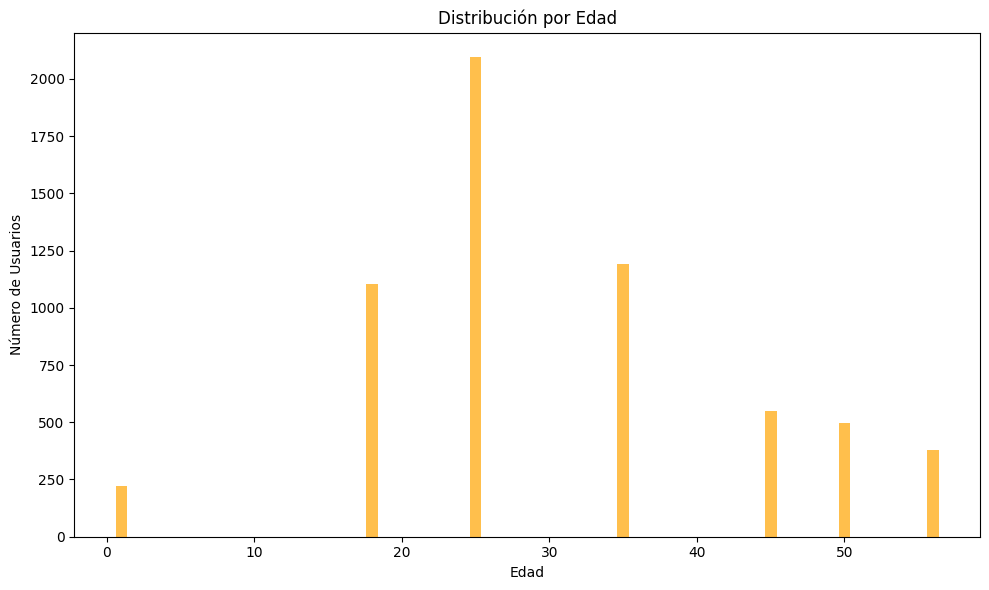

ESTADÍSTICAS DEMOGRÁFICAS:
Edad promedio: 30.6 años
Rango de edad: 1 - 56 años


In [49]:
# Distribución por edad
plt.figure(figsize=(10, 6))
age_counts = users['age'].value_counts().sort_index()
plt.bar(age_counts.index, age_counts.values, alpha=0.7, color='orange')
plt.xlabel('Edad')
plt.ylabel('Número de Usuarios')
plt.title('Distribución por Edad')
plt.tight_layout()
plt.show()

print("ESTADÍSTICAS DEMOGRÁFICAS:")
print(f"Edad promedio: {users['age'].mean():.1f} años")
print(f"Rango de edad: {users['age'].min()} - {users['age'].max()} años")


## 10. Resumen del Análisis EDA

In [51]:
print("="*60)
print("RESUMEN DEL ANÁLISIS EDA - MOVIELENS 1M DATASET")
print("="*60)

print(f"\n ESTADÍSTICAS GENERALES:")
print(f"\t• Usuarios: {n_users:,}")
print(f"\t• Películas: {n_movies:,}")
print(f"\t• Ratings: {n_ratings:,}")
print(f"\t• Sparsity: {sparsity*100:.2f}%")

print(f"\n DISTRIBUCIÓN DE RATINGS:")
print(f"\t• Rating promedio: {ratings['rating'].mean():.2f}")
print(f"\t• Rating más común: {ratings['rating'].mode().iloc[0]}")
print(f"\t• Ratings 4-5 estrellas: {((ratings['rating'] >= 4).sum() / len(ratings) * 100):.1f}%")

print(f"\n GÉNEROS:")
print(f"\t• Género más común: {genre_df.iloc[0]['Genre']} ({genre_df.iloc[0]['Count']} películas)")
print(f"\t• Total de géneros únicos: {len(genre_df)}")

print(f"\n GÉNEROS DE RELAJACIÓN:")
if relaxation_counts:
   total_relaxation = sum(relaxation_counts.values())
   print(f"\t• Películas de géneros relajantes: {total_relaxation}")
   most_relaxing = max(relaxation_counts, key=relaxation_counts.get)
   print(f"\t• Género más relajante: {most_relaxing} ({relaxation_counts[most_relaxing]} películas)")

print(f"\n DEMOGRAFÍA:")
print(f"\t• Usuarios masculinos: {(users['gender'] == 'M').mean()*100:.1f}%")
print(f"\t• Usuarios femeninos: {(users['gender'] == 'F').mean()*100:.1f}%")
print(f"\t• Edad promedio: {users['age'].mean():.1f} años")

print("\n" + "="*60)

RESUMEN DEL ANÁLISIS EDA - MOVIELENS 1M DATASET

 ESTADÍSTICAS GENERALES:
	• Usuarios: 6,040
	• Películas: 3,706
	• Ratings: 1,000,209
	• Sparsity: 95.53%

 DISTRIBUCIÓN DE RATINGS:
	• Rating promedio: 3.58
	• Rating más común: 4
	• Ratings 4-5 estrellas: 57.5%

 GÉNEROS:
	• Género más común: Drama (1603 películas)
	• Total de géneros únicos: 18

 GÉNEROS DE RELAJACIÓN:
	• Películas de géneros relajantes: 2209
	• Género más relajante: Comedy (1200 películas)

 DEMOGRAFÍA:
	• Usuarios masculinos: 71.7%
	• Usuarios femeninos: 28.3%
	• Edad promedio: 30.6 años

